In [673]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

In [674]:
    df = pd.read_csv("data.csv", delimiter='\t')
    df

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0,37.0,1.0,7400.0,9.0,7000.0,70000.0
1,45.0,3.0,33100.0,12.0,34000.0,337000.0
2,NaN,1.0,18700.0,5.0,17000.0,176000.0
3,39.0,2.0,29100.0,9.0,29000.0,289000.0
4,33.0,1.0,11400.0,6.0,10000.0,104000.0
5,28.0,1.0,20100.0,NaN,18000.0,184000.0
6,47.0,NaN,4400.0,15.0,6000.0,55000.0
7,36.0,2.0,30500.0,7.0,NaN,299000.0
8,45.0,3.0,32300.0,12.0,33000.0,330000.0
9,39.0,2.0,25900.0,9.0,26000.0,NaN


In [675]:
# Преобразование всех строковых столбцов, если они содержат числовые значения в виде строк
for column in df.columns:
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column], errors='coerce')
df

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0,37.0,1.0,7400.0,9.0,7000.0,70000.0
1,45.0,3.0,33100.0,12.0,34000.0,337000.0
2,NaN,1.0,18700.0,5.0,17000.0,176000.0
3,39.0,2.0,29100.0,9.0,29000.0,289000.0
4,33.0,1.0,11400.0,6.0,10000.0,104000.0
5,28.0,1.0,20100.0,NaN,18000.0,184000.0
6,47.0,NaN,4400.0,15.0,6000.0,55000.0
7,36.0,2.0,30500.0,7.0,NaN,299000.0
8,45.0,3.0,32300.0,12.0,33000.0,330000.0
9,39.0,2.0,25900.0,9.0,26000.0,NaN


In [676]:
# Среднее значение по каждому столбцу
# Параметр skipna=True игнорирует NaN значения.
mean_values = df.mean(skipna=True)
mean_values

Возраст(лет)                      39.306122
Количество иждивенцев              2.020408
Доход                          19304.081633
Срок проживания в регионе         10.244898
Оценка автомобиля заемщика     21530.612245
Размер кредита(тыс. руб.)     198979.591837
dtype: float64

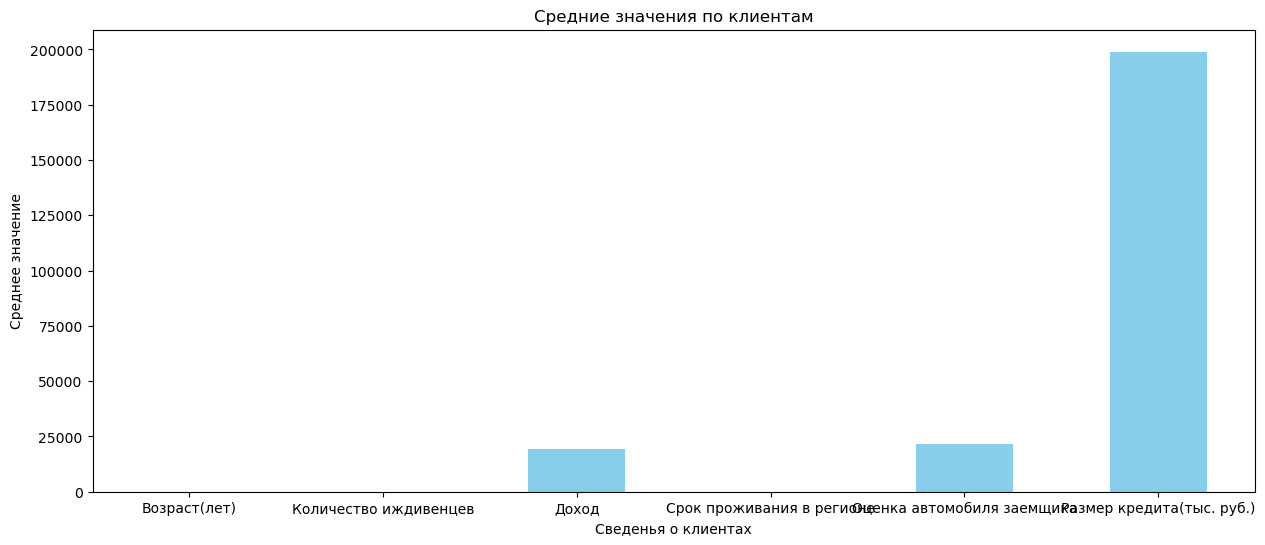

In [677]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
mean_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

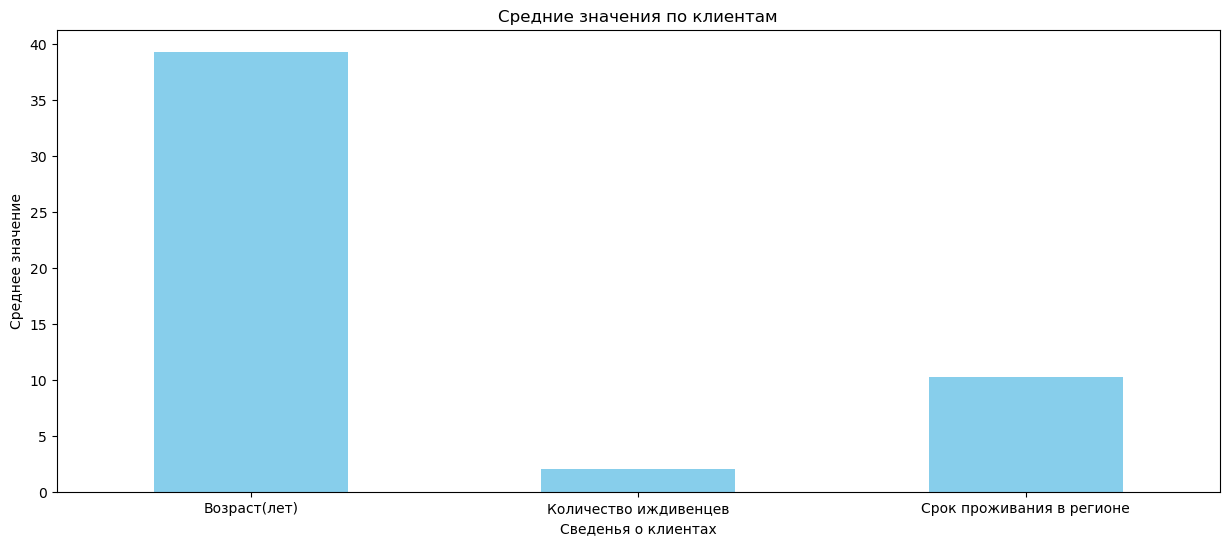

In [678]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
mean_values_small_values = mean_values.copy()
mean_values_small_values = mean_values_small_values.drop('Размер кредита(тыс. руб.)')
mean_values_small_values = mean_values_small_values.drop('Оценка автомобиля заемщика')
mean_values_small_values = mean_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
mean_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [679]:
# Стандартное отклонение по каждому столбцу
std_values = df.std(skipna=True)
std_values

Возраст(лет)                       8.979616
Количество иждивенцев              1.030570
Доход                           9979.478092
Срок проживания в регионе          4.798136
Оценка автомобиля заемщика     11264.069056
Размер кредита(тыс. руб.)     100571.179146
dtype: float64

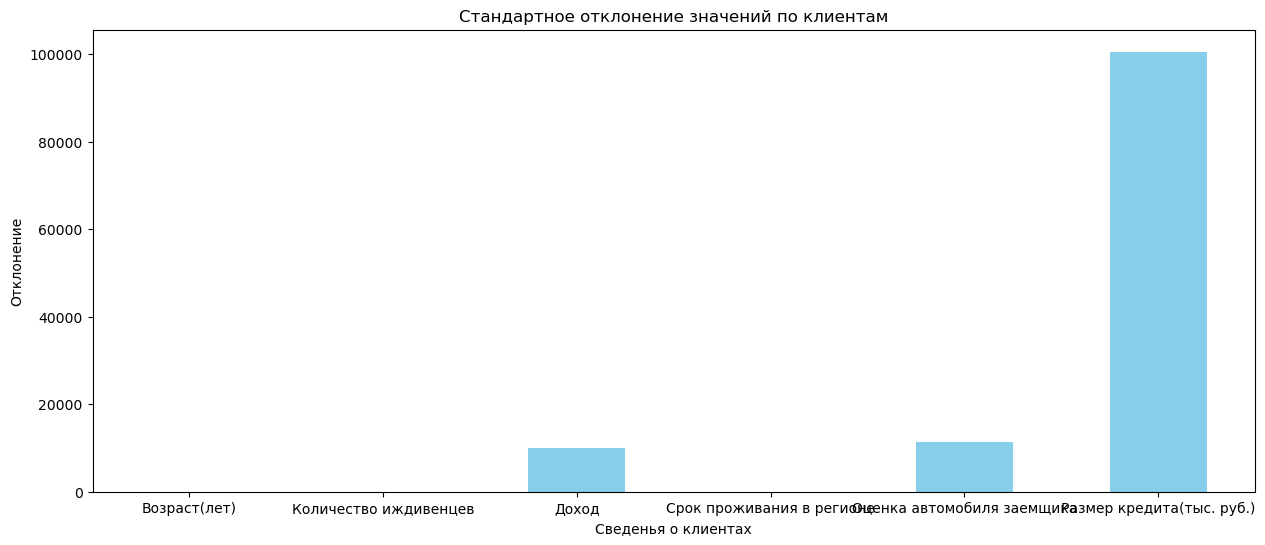

In [680]:
# Создаем гистограмму, что посмотреть как соотносятся данные
plt.figure(figsize=(15, 6))
std_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Стандартное отклонение значений по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Отклонение')
plt.xticks(rotation=0)

# Показать график
plt.show()

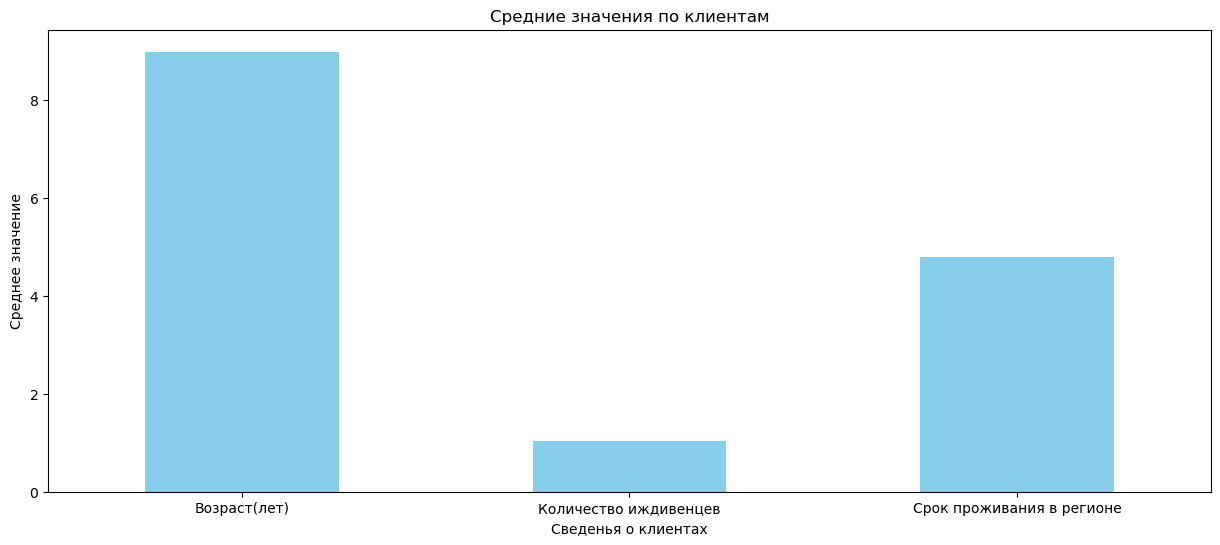

In [681]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
std_values_small_values = std_values.copy()
std_values_small_values = std_values_small_values.drop('Размер кредита(тыс. руб.)')
std_values_small_values = std_values_small_values.drop('Оценка автомобиля заемщика')
std_values_small_values = std_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
std_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [682]:
# Медиана по каждому столбцу
median_values = df.median(skipna=True)
median_values

Возраст(лет)                      39.0
Количество иждивенцев              2.0
Доход                          19600.0
Срок проживания в регионе         10.0
Оценка автомобиля заемщика     23000.0
Размер кредита(тыс. руб.)     193000.0
dtype: float64

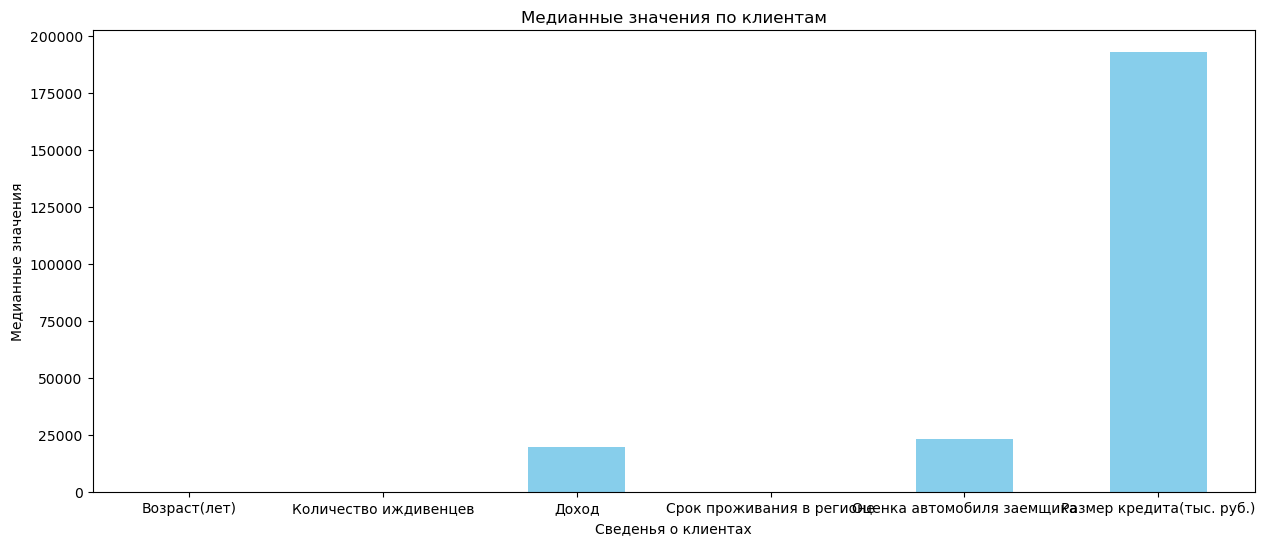

In [683]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
median_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Медианные значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Медианные значения')
plt.xticks(rotation=0)

# Показать график
plt.show()

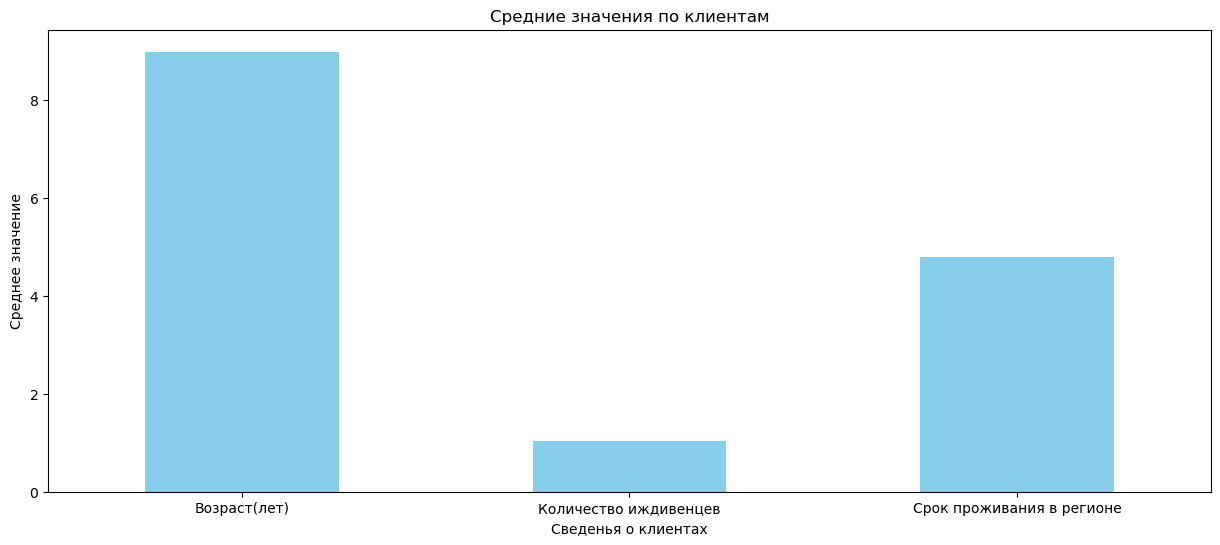

In [684]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
median_values_small_values = std_values.copy()
median_values_small_values = median_values_small_values.drop('Размер кредита(тыс. руб.)')
median_values_small_values = median_values_small_values.drop('Оценка автомобиля заемщика')
median_values_small_values = median_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
median_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [685]:
# Расчет квартилей (25%, 50%, 75%)
quantiles = df.quantile([0.25, 0.5, 0.75], interpolation='midpoint')
quantiles

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0.25,33.0,1.0,9800.0,7.0,12000.0,106000.0
0.50,39.0,2.0,19600.0,10.0,23000.0,193000.0
0.75,45.0,3.0,28400.0,13.0,29000.0,289000.0


<Figure size 1500x600 with 0 Axes>

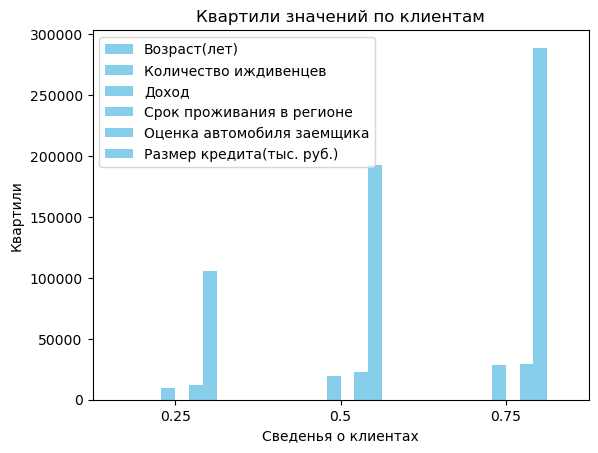

In [686]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
quantiles.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Квартили значений по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Квартили')
plt.xticks(rotation=0)

# Показать график
plt.show()

<Figure size 1500x600 with 0 Axes>

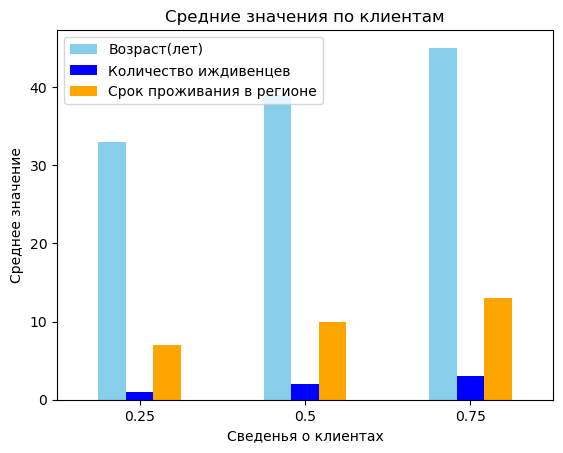

In [687]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
quantiles_small_values = quantiles.copy()
quantiles_small_values = quantiles_small_values.drop('Размер кредита(тыс. руб.)', axis=1)
quantiles_small_values = quantiles_small_values.drop('Оценка автомобиля заемщика', axis=1)
quantiles_small_values = quantiles_small_values.drop('Доход', axis=1)
# Создаем гистограмму
plt.figure(figsize=(15, 6))
quantiles_small_values.plot(kind='bar', color=['skyblue','blue','orange'],
                            y=["Возраст(лет)","Количество иждивенцев","Срок проживания в регионе" ])

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [688]:
# Вычисление корреляции
correlation_matrix = df.corr()
correlation_matrix

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
Возраст(лет),1.000000,0.758081,0.066615,0.852783,-0.138267,0.037650
Количество иждивенцев,0.758081,1.000000,0.299987,0.859576,0.438546,0.445352
Доход,0.066615,0.299987,1.000000,-0.179104,0.680764,0.949954
Срок проживания в регионе,0.852783,0.859576,-0.179104,1.000000,0.054343,-0.037055
Оценка автомобиля заемщика,-0.138267,0.438546,0.680764,0.054343,1.000000,0.878325
Размер кредита(тыс. руб.),0.037650,0.445352,0.949954,-0.037055,0.878325,1.000000


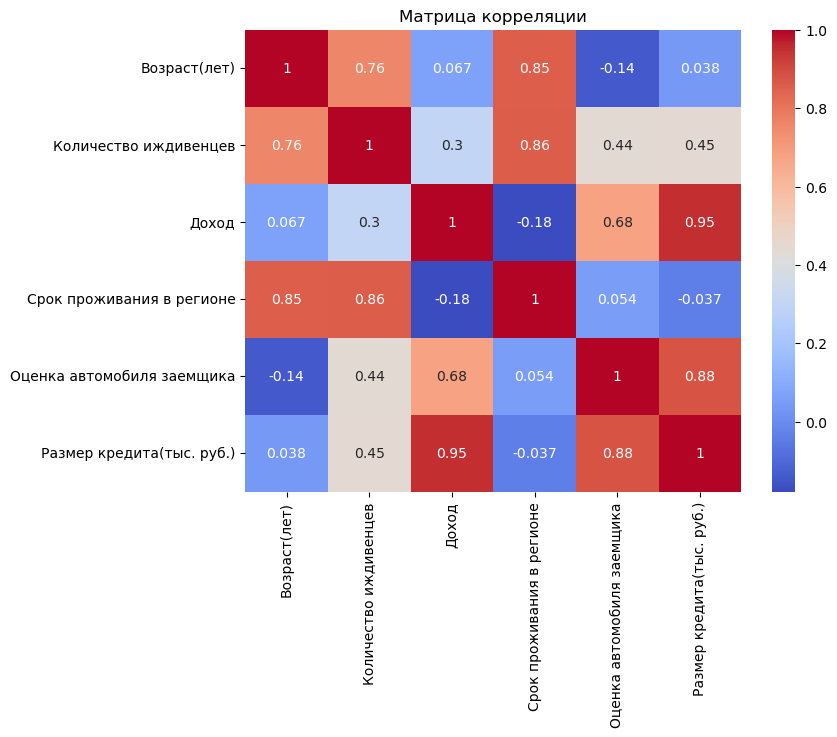

In [689]:
# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

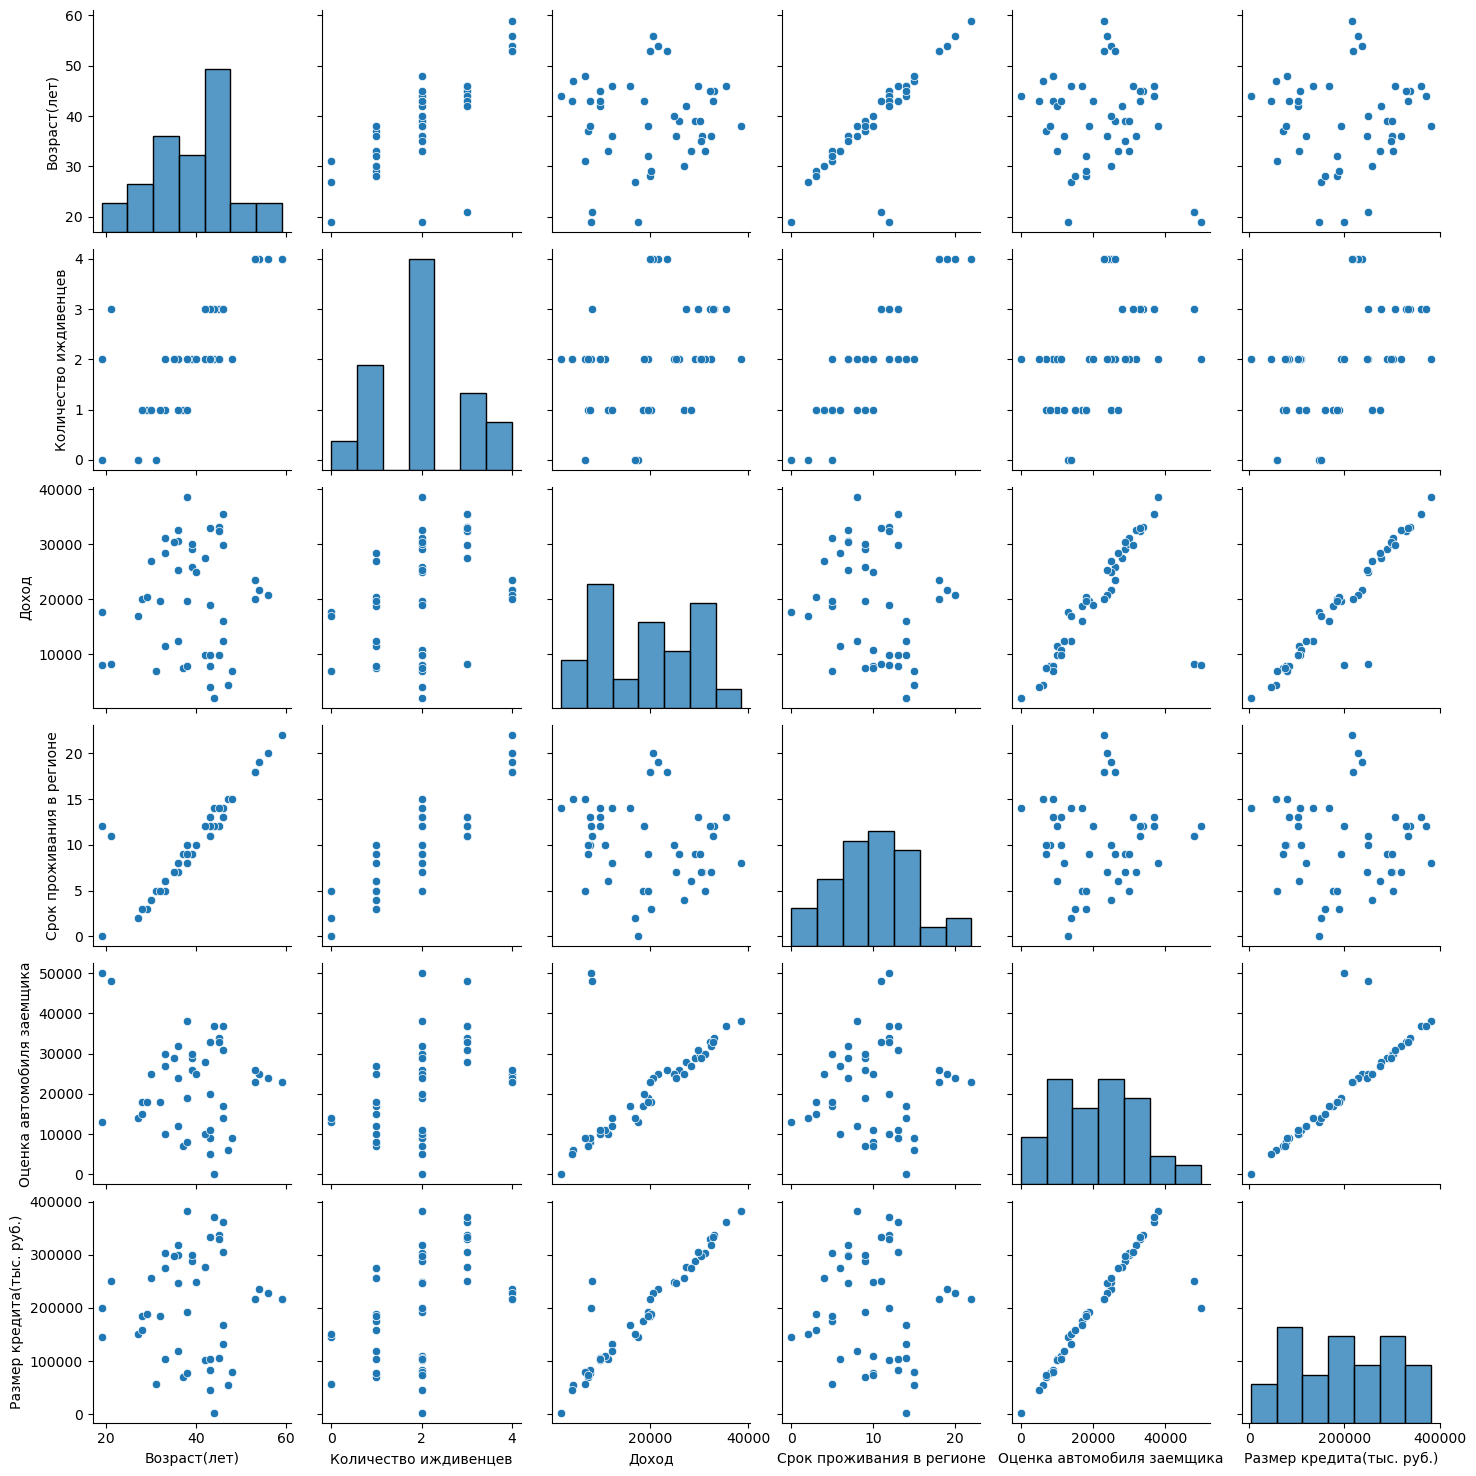

In [690]:
# Пары диаграмм (Pairplot)
sns.pairplot(df)
plt.show()

In [691]:
from scipy.stats import skew

# Вычисление коэффициент асимметрии
skewness = skew(df['Возраст(лет)'].dropna())
print(f'Коэффициент асимметрии для Возраст(лет): {skewness}')

skewness2 = skew(df['Количество иждивенцев'].dropna())
print(f'Коэффициент асимметрии для Количество иждивенцев: {skewness2}')

skewness3 = skew(df['Доход'].dropna())
print(f'Коэффициент асимметрии для Доход: {skewness3}')

skewness4 = skew(df['Срок проживания в регионе'].dropna())
print(f'Коэффициент асимметрии для Срок проживания в регионе: {skewness4}')

skewness5 = skew(df['Оценка автомобиля заемщика'].dropna())
print(f'Коэффициент асимметрии для Оценка автомобиля заемщика: {skewness5}')

skewness6 = skew(df['Размер кредита(тыс. руб.)'].dropna())
print(f'Коэффициент асимметрии для Размер кредита(тыс. руб.): {skewness6}')

Коэффициент асимметрии для Возраст(лет): -0.21893116446447733
Коэффициент асимметрии для Количество иждивенцев: 0.18997192070550514
Коэффициент асимметрии для Доход: 0.04062224283545259
Коэффициент асимметрии для Срок проживания в регионе: 0.22130938018538532
Коэффициент асимметрии для Оценка автомобиля заемщика: 0.35518677856062253
Коэффициент асимметрии для Размер кредита(тыс. руб.): 0.014160074638642285


In [692]:
# Межквартильный размах
Q3 = quantiles['Возраст(лет)'].array[2]
Q1 = quantiles['Возраст(лет)'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Возраст(лет)'] < (Q1 - 1.5 * IQR)) | (df['Возраст(лет)'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Возраст(лет): {len(outliers)}')

###################################################################################################
Q3 = quantiles['Количество иждивенцев'].array[2]
Q1 = quantiles['Количество иждивенцев'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Количество иждивенцев'] < (Q1 - 1.5 * IQR)) | (df['Количество иждивенцев'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Количество иждивенцев: {len(outliers)}')
#######################################################################################################
Q3 = quantiles['Количество иждивенцев'].array[2]
Q1 = quantiles['Количество иждивенцев'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Количество иждивенцев'] < (Q1 - 1.5 * IQR)) | (df['Количество иждивенцев'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Количество иждивенцев: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Доход'].array[2]
Q1 = quantiles['Доход'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Доход'] < (Q1 - 1.5 * IQR)) | (df['Доход'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Доход: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Срок проживания в регионе'].array[2]
Q1 = quantiles['Срок проживания в регионе'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Срок проживания в регионе'] < (Q1 - 1.5 * IQR)) | (df['Срок проживания в регионе'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Срок проживания в регионе: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Оценка автомобиля заемщика'].array[2]
Q1 = quantiles['Оценка автомобиля заемщика'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Оценка автомобиля заемщика'] < (Q1 - 1.5 * IQR)) | (df['Оценка автомобиля заемщика'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Оценка автомобиля заемщика: {len(outliers)}')

#######################################################################################################
Q3 = quantiles['Размер кредита(тыс. руб.)'].array[2]
Q1 = quantiles['Размер кредита(тыс. руб.)'].array[0]

IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Размер кредита(тыс. руб.)'] < (Q1 - 1.5 * IQR)) | (df['Размер кредита(тыс. руб.)'] > (Q3 + 1.5 * IQR))]
print(f'Количество выбросов для Размер кредита(тыс. руб.): {len(outliers)}')


Количество выбросов для Возраст(лет): 0
Количество выбросов для Количество иждивенцев: 0
Количество выбросов для Количество иждивенцев: 0
Количество выбросов для Доход: 0
Количество выбросов для Срок проживания в регионе: 0
Количество выбросов для Оценка автомобиля заемщика: 0
Количество выбросов для Размер кредита(тыс. руб.): 0


## **Выводы анализа:**

* Однородность
    По гистрограмам средних и медианых значений видно, что они близки. Посчитав межквартильный размах и пары диаграмм эта теория подтвердилась. Также это видно на диаграмме квартелей.
* Близкое к симметричному распределению.
    На это указывают низкие коэффициенты ассиметрии у данных.
* Малое колличество выбросов
    Данный вывод сделан на основе пары диаграмм и меквартильного размаха.
* Колличество иждевенцев зависят от
    * Срока проживания в регионе
    * Возраста
    * Размера кредита
    * Оценки авто
    * Дохода
* Срок проживания в регионе зависит от
    * Возраста
    * Колличества иждевенцев
* Размер кредита зависит от
    * Дохода
    * Количества иждевенцев
* Оценка автомобиля зависит от
    * Размера кредита
    * Дохода
    * Колличества иждевенцев
* Возраст зависит от
    * Срока проживания в регионе
    * Колличества иждевенцев
* Доход зависит от
    * Размера кредита
    * Оценки авто
    * Колличества иждевенцев

In [693]:
from sklearn.impute import KNNImputer
# Импутация методом ближайших соседей (KNN)
imputer = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_knn

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0,37.0,1.0,7400.0,9.0,7000.0,70000.0
1,45.0,3.0,33100.0,12.0,34000.0,337000.0
2,37.5,1.0,18700.0,5.0,17000.0,176000.0
3,39.0,2.0,29100.0,9.0,29000.0,289000.0
4,33.0,1.0,11400.0,6.0,10000.0,104000.0
5,28.0,1.0,20100.0,8.5,18000.0,184000.0
6,47.0,1.0,4400.0,15.0,6000.0,55000.0
7,36.0,2.0,30500.0,7.0,29500.0,299000.0
8,45.0,3.0,32300.0,12.0,33000.0,330000.0
9,39.0,2.0,25900.0,9.0,26000.0,253000.0


In [694]:
# Центрирование данных (вычитание среднего)
# Вычесть среднее значение каждого признака из значений признака, чтобы все признаки имели среднее значение 0.
mean_centered_df = df_knn - df_knn.mean()

# Нормировка данных, чтобы евклидова норма каждого признака была равна 1
# Нормировка: Разделить каждый признак на его евклидову норму, чтобы каждый признак имел евклидову норму, равную 1
Z = mean_centered_df.apply(lambda x: x / np.sqrt(np.sum(x**2)), axis=0)

Z

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0,-0.035828,-0.133139,-0.171826,-0.034551,-0.175982,-0.186596
1,0.092658,0.141048,0.188234,0.055281,0.159040,0.194726
2,-0.027798,-0.133139,-0.013512,-0.154327,-0.051900,-0.035210
3,-0.003706,0.003955,0.132194,-0.034551,0.096999,0.126173
4,-0.100071,-0.133139,-0.115786,-0.124383,-0.138757,-0.138038
5,-0.180375,-0.133139,0.006102,-0.049523,-0.039492,-0.023785
6,0.124780,-0.133139,-0.213857,0.145113,-0.188390,-0.208019
7,-0.051889,0.003955,0.151808,-0.094439,0.103203,0.140455
8,0.092658,0.141048,0.177026,0.055281,0.146632,0.184728
9,-0.003706,0.003955,0.087361,-0.034551,0.059774,0.074759


In [695]:
# Вычисление сингулярного разложения
U, S, Vt = np.linalg.svd(Z, full_matrices=False)
U

array([[-1.87786799e-01, -4.99122468e-02,  1.04423604e-02,
         1.75830380e-02, -1.36696642e-02, -2.37765025e-02],
       [ 2.02732501e-01,  2.16184459e-02,  4.94630186e-02,
         7.86243108e-03, -3.80072507e-02, -1.62306443e-02],
       [-8.61315233e-02,  7.87127537e-02,  1.12747390e-01,
         9.73405331e-04, -3.86131228e-01,  1.05574393e-01],
       [ 9.14003013e-02,  8.39581502e-02,  5.61783450e-02,
         6.54483138e-02, -1.65531352e-02, -2.69816639e-03],
       [-1.70795116e-01,  3.56526295e-02,  1.80498314e-02,
        -9.47986726e-02, -2.52690476e-02,  1.47279362e-02],
       [-8.20357023e-02,  1.02123599e-01, -3.63059662e-02,
         1.09966651e-01,  6.11986734e-01, -6.78003444e-02],
       [-1.61318025e-01, -1.91622049e-01,  3.79187456e-02,
         3.35366862e-01, -1.03768673e-01, -1.41884717e-01],
       [ 8.73566555e-02,  1.32220844e-01,  5.50444616e-02,
        -3.40394063e-02,  1.86593976e-03, -1.35771130e-03],
       [ 1.93736747e-01,  1.50173484e-02,  4.889

In [696]:
# Вычисление объясненной дисперсии с использованием сингулярных значений
explained_variance_ratio = (S**2) / np.sum(S**2)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Результаты
print("Объясненная дисперсия для каждого фактора:", explained_variance_ratio)
print("Накопленная объясненная дисперсия:", cumulative_explained_variance)

# Поиск количества факторов, достаточных для объяснения 90% дисперсии
threshold = 0.9
k = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Количество факторов для объяснения {threshold*100}% дисперсии: {k}")
np.sum(explained_variance_ratio[:k])

Объясненная дисперсия для каждого фактора: [5.18753603e-01 3.78792667e-01 7.84974405e-02 1.99119614e-02
 3.62642762e-03 4.17900417e-04]
Накопленная объясненная дисперсия: [0.5187536  0.89754627 0.97604371 0.99595567 0.9995821  1.        ]
Количество факторов для объяснения 90.0% дисперсии: 3


0.9760437105781934

In [697]:
# Уменьшенная версия матрицы Z
U_k = U[:, :k]
S_k = np.diag(S[:k])
V_k_t = Vt[:k, :]
Z_k = np.dot(U_k, np.dot(S_k, V_k_t))
Z_k

array([[-3.78170179e-02, -1.28219630e-01, -1.70463837e-01,
        -3.67073709e-02, -1.78250104e-01, -1.88212817e-01],
       [ 8.90179148e-02,  1.43612950e-01,  1.90996734e-01,
         5.67558793e-02,  1.56062156e-01,  1.93740393e-01],
       [-6.16672660e-02, -1.28613809e-01,  8.36077766e-03,
        -1.24602841e-01, -7.89007409e-02, -3.15224939e-02],
       [-8.38622801e-03,  2.17988668e-02,  1.33016964e-01,
        -4.50320093e-02,  8.92324845e-02,  1.23611180e-01],
       [-9.75981151e-02, -1.58439314e-01, -1.14124128e-01,
        -1.05393857e-01, -1.30891174e-01, -1.33957302e-01],
       [-1.32529947e-01, -1.10321839e-01, -3.14639153e-02,
        -1.16434557e-01, -9.98117732e-03, -2.98166107e-02],
       [ 9.95359625e-02, -4.13709511e-02, -2.05341220e-01,
         9.25873839e-02, -2.27104875e-01, -2.26265863e-01],
       [-5.00317076e-02, -5.24744374e-03,  1.51873051e-01,
        -8.84753377e-02,  1.06855648e-01,  1.41669458e-01],
       [ 9.02645346e-02,  1.39755058e-01,  1.804

In [698]:
# Вычисление погрешности
error_matrix = Z - Z_k

# Операторная (спектральная) норма — это максимальное сингулярное значение ошибки
spectral_norm = np.linalg.norm(error_matrix, ord=2)

# Норма Фробениуса
frobenius_norm = np.linalg.norm(error_matrix, 'fro')

# Результаты
print(f"Операторная норма ошибки: {spectral_norm}")
print(f"Норма Фробениуса ошибки: {frobenius_norm}")

Операторная норма ошибки: 0.34564688380484526
Норма Фробениуса ошибки: 0.3791275992734373


In [699]:
# Представление клиентов в новом пространстве
Z_reduced = U[:, :k] @ np.diag(S[:k])
V_k_t

array([[ 0.24865564,  0.45628639,  0.45566655,  0.23611764,  0.46228195,
         0.50287668],
       [-0.54239835, -0.32976994,  0.30948494, -0.5767364 ,  0.28172127,
         0.29880285],
       [ 0.52316853, -0.26036582,  0.52828841, -0.26216004, -0.54389175,
         0.12194078]])

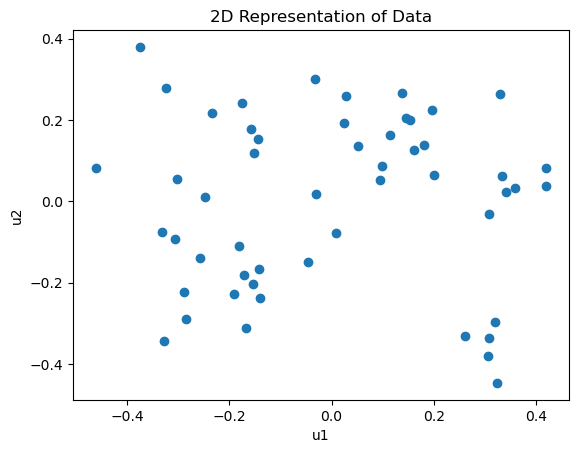

In [700]:
# Визуализация для 0 и 1
if k >= 2:
    plt.scatter(Z_reduced[:, 0], Z_reduced[:, 1])
    plt.title('2D Representation of Data')
    plt.xlabel('u1')
    plt.ylabel('u2')
    plt.show()

### Выводы о клиентах банка:

- Только 3 характеристики из набора являются основными, т.к. объясняют 97 процентов дисперсии
- Карта клиентов показывает, что существуют группы, в которые объединены клиенты.
- Карта клиентов так же показывает выбросы, на которые стоит обратить внимание как на нетипичных пользователей.
- Норма Фрабениуса равную 0.37 будем считать приемлимой для задачи анализа данных клиентов, что говорит о том, что меньшая размерность неплохо объясняет данные.

Стресс размещения MDS: 2.210233709634724


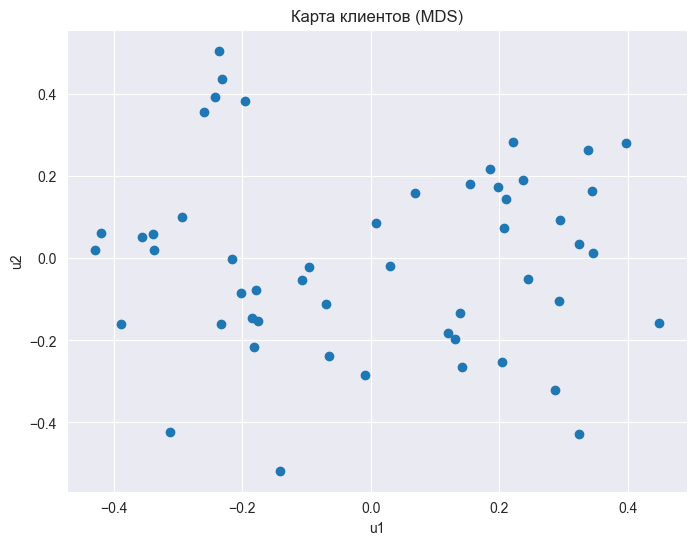

In [87]:
# MDS
# 9. Вычисление расстояний
dist_matrix = pairwise_distances(Z, metric='euclidean')

# 10. MDS для проекции в 2D
mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto')
X_2d_mds = mds.fit_transform(dist_matrix)

# Оценка погрешности (стресс MDS)
stress = mds.stress_
print(f"Стресс размещения MDS: {stress}")

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_mds[:, 0], X_2d_mds[:, 1])
plt.title("Карта клиентов (MDS)")
plt.xlabel("u1")
plt.ylabel("u2")
plt.show()

Стресс > 0.2: Плохое соответствие, необходимо больше измерений или MDS плохо работает для этих данных.

В общем график походж на график SVD разложения


In [70]:
loading_matrix = Vt.T[:, :k].dot(np.diag(S[:k]))

print('Loading matrix:n')
for i, feature in enumerate(Z.columns):
    pad = 14 - len(feature)
    print(f'(z{i+1}) {feature}' + ' ' * pad +
          f'= {loading_matrix[i, 0]:.2f}*u1 + {loading_matrix[i, 1]:.2f}*u2 + {loading_matrix[i, 2]:.2f}*u3')


Loading matrix:n
(z1) Возраст(лет)  = 0.44*u1 + -0.82*u2 + 0.36*u3
(z2) Количество иждивенцев= 0.80*u1 + -0.50*u2 + -0.18*u3
(z3) Доход         = 0.80*u1 + 0.47*u2 + 0.36*u3
(z4) Срок проживания в регионе= 0.42*u1 + -0.87*u2 + -0.18*u3
(z5) Оценка автомобиля заемщика= 0.82*u1 + 0.42*u2 + -0.37*u3
(z6) Размер кредита(тыс. руб.)= 0.89*u1 + 0.45*u2 + 0.08*u3


1. u1:
   - Наибольшие положительные влияния оказывают:
     - Количество иждивенцев (z2: 0.80)
     - Доход (z3: 0.80)
     - Оценка автомобиля заемщика (z5: 0.82)
     - Размер кредита (z6: 0.89)
   - Этот фактор (u1) тесно связан с финансовыми аспектами и оценкой имущества.

2. u2:
   - Наибольшие отрицательные влияния оказывают:
     - Возраст (z1: -0.82)
     - Срок проживания в регионе (z4: -0.87)
   - Этот фактор (u2) связан с демографическими признаками и стабильностью проживания.

3. u3:
   - Все коэффициенты относительно малы, что может указывать на то, что этот фактор (u3) менее значим в сравнении с u1 и u2, или влияет на разнообразные аспекты с меньшей интенсивностью.

### Группы признаков:

- Фактор u1 связан с:
  - Финансовыми показателями: Количество иждивенцев, Доход, Оценка автомобиля, Размер кредита.

- Фактор u2 связан с:
  - Демографическими и социально-стабильными показателями: Возраст, Срок проживания в регионе.

- Фактор u3 не выделяется как доминирующий для каких-либо конкретных признаков, так как его значения малы по сравнению с другими факторами.

### Интерпретация главных факторов:

1. Фактор u1 (Финансовый профиль клиента):
   - Описание: Этот фактор указывает на финансовую состоятельность клиента. Высокие коэффициенты для таких показателей, как количество иждивенцев, доход, оценка автомобиля и размер кредита, свидетельствуют о его связи с финансовыми аспектами жизни клиентов. u1 может отражать уровень материального благосостояния или потенциальные риски, связанные с большими финансовыми обязательствами.

2. Фактор u2 (Демографическая устойчивость):
   - Описание: u2 отражает стабильность и демографические аспекты, такие как возраст и срок проживания в регионе. Отрицательные коэффициенты показывают, что более молодые и недавно переехавшие клиенты оказывают меньший вклад в этот фактор.

3. Фактор u3 (Второстепенные влияния):
   - Описание: u3 не имеет значительных коэффициентов по сравнению с другими факторами, что показывает, что он не оказывает существенного воздействия на какие-то конкретные аспекты. Он может указывать на разнообразные и менее значимые влияния.

### Интерпретация карты клиентов:

- Сегмент 1: Высокое u1 и u2 — клиенты с высокой финансовой стабильностью и демографической устойчивостью, идеальные для долгосрочных финансовых продуктов.
- Сегмент 2: Высокое u1 и низкое u2 — клиенты с высокой финансовой активностью, но с меньшей демографической стабильностью, мишень для мобильных и гибких решений.
- Сегмент 3: Низкое u1 и высокое u2 — клиенты с небольшими финансовыми потребностями, но стабильные, потенциально верные долгосрочные партнеры.
- Сегмент 4: Низкое u1 и u2 — клиенты, у которых отсутствуют выраженные финансовые и демографические преимущества, требуют индивидуального подхода